In [1]:
%run lm_ode.ipynb

In [2]:
import matplotlib.pyplot as plt

# Model 1: Homogeneous gas phase reaction model
$$2NO+O_2\leftrightarrow2NO_2$$
is described by the following equation
$$\frac{dy}{dt}=k_1(126.2-y)(91.9-y)^2-k_2y^2;~~y(0)=0$$

## Scaling for parameter estimation
$$\frac{du}{d\bar{t}}=k_1t_cy_c^2(126.2/y_c-u)(91.9/y_c-u)^2-t_ck_2y_cu^2$$
Let $y_c=91.9$ and $t_c=t_\text{end}$,
$$\frac{du}{d\bar{t}}=91.9^2t_\text{end}k_1(126.2/91.9-u)(1-u)^2-91.9t_\text{end}k_2u^2$$
$$\frac{du}{d\bar{t}}=\bar{k}_1(126.2/91.9-u)(1-u)^2-\bar{k}_2u^2$$
where $k_1=\frac{\bar{k}_1}{91.9^2t_\text{end}}$ and $k_2=\frac{\bar{k}_2}{91.9t_\text{end}}$.

In [3]:
def model1_scaled(u,kbar):
    dudt = kbar[0]*(126.2/91.9-u)*(1-u)**2-kbar[1]*u**2
    return dudt

In [4]:
yhat=np.array([[0,1.4,6.3,10.5,14.2,17.6,21.4,23.0,27.0,30.5,34.4,38.8,41.6,43.5,45.3]])
t = np.array([0,1,2,3,4,5,6,7,9,11,14,19,24,29,39])
k = np.array([0.4577e-5,0.2796e-3])
yc = 91.9
uhat = yhat/yc
u0 = uhat[0]
tc = t[-1]
tbar = t/tc
Q = np.eye(1)
Kc = np.array([[91.9**2*tc,0],[0,91.9*tc]])
kbar = Kc@k

In [5]:
res = integrator_jacobian(model1_scaled,u0,kbar,tbar)

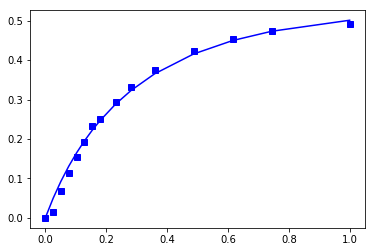

In [6]:
plt.plot(tbar,uhat[0],'bs')
plt.plot(tbar,res[0][0],'b')

## Paramter estimation with given paramters

In [7]:
k_est = lm(model1_scaled,uhat,Q,kbar,tbar,[1e-6,1e-8,1e-8,100])

Iter | Obj func | red grad | lin appr |   mu   |   rho
    0|1.2945e-03|  3.35e-06|  Not cal | 3.2e-07| Not cal
-7.22311547275532e-11
    1|1.2945e-03|  3.35e-06|  3.61e-11| 6.4e-07|-1.4e+01
-7.22288990027772e-11
    2|1.2947e-03|  3.35e-06|  3.61e-11| 2.6e-06|-3.9e+03
-7.221537003915974e-11
    3|1.2946e-03|  3.35e-06|  3.61e-11| 2.1e-05|-9.7e+02
-7.208954326334604e-11
    4|1.2946e-03|  3.35e-06|  3.61e-11| 3.3e-04|-6.6e+02
-7.005017960513601e-11
    5|1.2945e-03|  1.58e-07|  3.61e-11| 1.1e-04| 7.1e+02
-3.5533068635246673e-12
    6|1.2946e-03|  1.58e-07|  1.81e-12| 2.2e-04|-7.8e+04
-3.487351931680873e-12
    7|1.2945e-03|  1.58e-07|  1.81e-12| 8.8e-04|-2.5e+04
-3.1387349042023985e-12
    8|1.2945e-03|  1.58e-07|  1.78e-12| 7.0e-03|-1.7e+04
-1.6418799893639118e-12
    9|1.2946e-03|  1.58e-07|  1.26e-12| 1.1e-01|-1.1e+05
-2.2250389680885182e-13
   10|1.2946e-03|  1.58e-07|  2.02e-13| 3.6e+00|-4.4e+05
-1.162198135825673e-14
   11|1.2945e-03|  1.58e-07|  1.41e-14| 2.3e+02|-8.2e+03
-1.902

In [8]:
kbar

array([1.50756672, 1.00211436])

In [9]:
k_est

[array([1.50759571, 1.00219128]),
 array([[0.        , 0.04950364, 0.09275517, 0.13086442, 0.16468069,
         0.19486026, 0.22194375, 0.24634307, 0.28844724, 0.32330281,
         0.36527394, 0.41564799, 0.44971825, 0.47320477, 0.5011796 ]]),
 [12, 'h']]

In [10]:
k0 = np.array([1e-6,1e-6])
kbar0 = Kc@k0

In [11]:
k_est2 = lm(model1_scaled,uhat,Q,kbar0,tbar,[1e-6,1e-8,1e-8,100])

Iter | Obj func | red grad | lin appr |   mu   |   rho
    0|2.3750e-01|  2.49e-01|  Not cal | 1.4e-07| Not cal
-0.43762898284516205
    1|2.9881e-02|  1.24e-01|  2.19e-01| 4.7e-08| 9.5e-01
-0.05779664422593408
    2|3.5028e-03|  3.18e-02|  2.89e-02| 2.1e-08| 9.1e-01
-0.004443925566648058
    3|1.3097e-03|  1.50e-03|  2.22e-03| 6.9e-09| 9.9e-01
-3.12594661275148e-05
    4|1.2946e-03|  4.46e-05|  1.56e-05| 2.3e-09| 9.7e-01
-2.6039873979417688e-08
    5|1.2947e-03|  4.46e-05|  1.30e-08| 4.6e-09|-2.3e+00
-2.603986566195062e-08
    6|1.2945e-03|  1.49e-06|  1.30e-08| 1.5e-09| 1.1e+01
-8.573782468665151e-12
    7|1.2945e-03|  1.49e-06|  4.29e-12| 3.1e-09|-6.2e+03
-8.57378195744243e-12
    8|1.2945e-03|  1.49e-06|  4.29e-12| 1.2e-08|-1.6e+03
-8.573778890111661e-12
    9|1.2945e-03|  1.49e-06|  4.29e-12| 9.8e-08|-3.7e+03
-8.573750262147487e-12
   10|1.2946e-03|  1.49e-06|  4.29e-12| 1.6e-06|-3.5e+04
-8.573259625219097e-12
   11|1.2945e-03|  1.93e-07|  4.29e-12| 5.2e-07| 3.6e+03
-2.28114142848

In [12]:
k_est2

[array([1.50759108, 1.00217478]),
 array([[0.        , 0.04950349, 0.09275491, 0.13086406, 0.16468029,
         0.19485982, 0.22194329, 0.24634258, 0.28844676, 0.32330238,
         0.36527357, 0.41564782, 0.44971837, 0.47320499, 0.50118026]]),
 [19, 'h']]